# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [3]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing.image import load_img

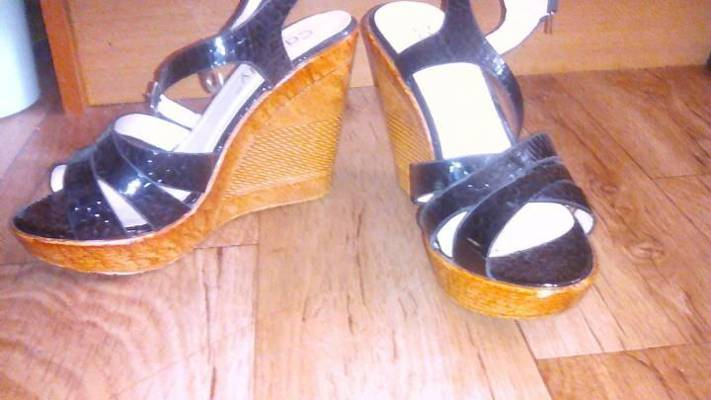

In [12]:
path = './clothing-dataset-small/train/shoes'
name = '08215318-faff-4037-bee9-5bceb0af7747.jpg'
fullname = f'{path}/{name}'
# img_main = load_img(fullname)
load_img(fullname)

In [11]:
x = np.array(img_main)
x.shape

(400, 711, 3)

Load image with image size being specified: 299 x 299

In [13]:
img = load_img(fullname, target_size=(299, 299))

In [14]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [15]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [16]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 12s 0us/step


In [17]:
X = np.array([x])

In [18]:
X.shape

(1, 299, 299, 3)

Vectors input are preprocessed to the shape suitable for the model.

In [19]:
X = preprocess_input(X)

In [20]:
pred = model.predict(X)

1/1 [==============================] - 9s 9s/step


See the list of classes with probabiliies.

In [21]:
decode_predictions(pred)

[[('n04133789', 'sandal', 0.9387831),
  ('n04200800', 'shoe_shop', 0.018368449),
  ('n03047690', 'clog', 0.016259188),
  ('n03680355', 'Loafer', 0.0057312),
  ('n04120489', 'running_shoe', 0.0012967881)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Tranfser learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [24]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [25]:
X, y = next(train_ds)

In [26]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [28]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors) # Activation is None, so we set from_logits=True. If softmax is used, from_logits=False
model = keras.Model(inputs, outputs)

In [29]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [30]:
with tf.device("/device:GPU:0"):
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 37s 336ms/step - loss: 1.2930 - accuracy: 0.6675 - val_loss: 0.7622 - val_accuracy: 0.7947
Epoch 2/10
96/96 [==============================] - 10s 106ms/step - loss: 0.5390 - accuracy: 0.8272 - val_loss: 1.0632 - val_accuracy: 0.7214
Epoch 3/10
96/96 [==============================] - 10s 103ms/step - loss: 0.3834 - accuracy: 0.8755 - val_loss: 0.8569 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 10s 99ms/step - loss: 0.2613 - accuracy: 0.9078 - val_loss: 0.8935 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 10s 99ms/step - loss: 0.1684 - accuracy: 0.9397 - val_loss: 1.0183 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 10s 102ms/step - loss: 0.1233 - accuracy: 0.9537 - val_loss: 0.8599 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 10s 101ms/step - loss: 0.0879 - accuracy: 0.9746 - val_loss: 0.9052 - val_accuracy: 0.8094
E

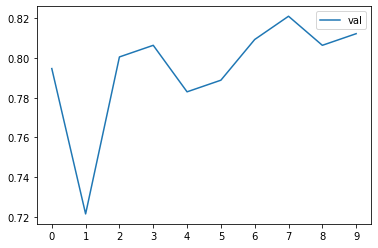

In [31]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [32]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [33]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    with tf.device("/device:GPU:0"):
        history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 111ms/step - loss: 2.0322 - accuracy: 0.3064 - val_loss: 1.7064 - val_accuracy: 0.4516
Epoch 2/10
96/96 [==============================] - 9s 97ms/step - loss: 1.4417 - accuracy: 0.5310 - val_loss: 1.3199 - val_accuracy: 0.5748
Epoch 3/10
96/96 [==============================] - 9s 93ms/step - loss: 1.1695 - accuracy: 0.6235 - val_loss: 1.1152 - val_accuracy: 0.6452
Epoch 4/10
96/96 [==============================] - 9s 92ms/step - loss: 1.0152 - accuracy: 0.6754 - val_loss: 0.9956 - val_accuracy: 0.6804
Epoch 5/10
96/96 [==============================] - 9s 93ms/step - loss: 0.9150 - accuracy: 0.7053 - val_loss: 0.9079 - val_accuracy: 0.7243
Epoch 6/10
96/96 [==============================] - 9s 91ms/step - loss: 0.8440 - accuracy: 0.7285 - val_loss: 0.8515 - val_accuracy: 0.7361
Epoch 7/10
96/96 [==============================] - 9s 91ms/step - loss: 0.7893 - accuracy: 0.7432 - val_loss: 0.8111 - val_accuracy: 0.7713
Epoc

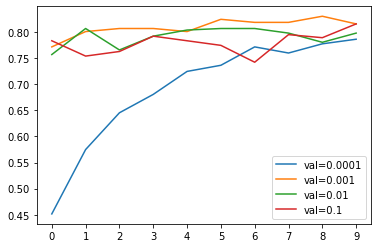

In [38]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [43]:
predict_y = model.predict(X[:16])

1/1 [==============================] - 0s 52ms/step


In [44]:
predict_y

array([[ 2.88059044e+01, -1.20267334e+02,  2.35246220e+01,
        -1.57845184e+02, -8.31341782e+01,  2.07781906e+01,
        -1.14620117e+02, -2.47327213e+01, -4.70165138e+01,
         7.69358292e+01],
       [-9.45403290e+01, -7.73248444e+01,  7.83470392e-01,
        -1.70199127e+02, -2.31506901e+01, -4.27613106e+01,
         4.37348816e+02, -1.28563599e+02, -1.24180008e+02,
        -5.84972839e+01],
       [ 8.24683094e+00, -1.30618179e+02, -2.37394524e+00,
        -1.88823563e+02, -7.22688522e+01, -3.81820560e+00,
        -1.34827927e+02,  2.60630054e+01, -1.58850266e+02,
         1.94533386e+02],
       [-6.33167152e+01, -8.17027893e+01, -9.65167389e+01,
        -1.05151291e+02,  2.62922821e+01, -4.70342445e+01,
         2.10173340e+02, -4.03760796e+01, -7.46470032e+01,
        -2.33708000e+00],
       [ 2.17545013e+01, -1.38320099e+02, -7.14198227e+01,
         3.89962921e+01, -1.46418619e+01, -2.66622353e+01,
        -7.37181015e+01, -1.43473530e+01, -1.11763550e+02,
         2.

In [ ]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [70]:
model.save_weights('model_v1.h5', save_format='h5')

In [21]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [79]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 21s 216ms/step - loss: 1.1353 - accuracy: 0.6170 - val_loss: 0.7258 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 16s 168ms/step - loss: 0.6469 - accuracy: 0.7735 - val_loss: 0.6332 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 16s 169ms/step - loss: 0.5182 - accuracy: 0.8243 - val_loss: 0.5905 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 16s 170ms/step - loss: 0.4390 - accuracy: 0.8553 - val_loss: 0.5550 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 16s 170ms/step - loss: 0.3827 - accuracy: 0.8827 - val_loss: 0.5437 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 16s 170ms/step - loss: 0.3342 - accuracy: 0.8990 - val_loss: 0.5319 - val_accuracy: 0.8358
Epoch 7/10
96/96 [==============================] 

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [3]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [13]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
83689472/83683744 [==============================] - 1s 0us/step
[2021-11-03 13:35:43.005 ip-172-16-64-149:21634 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 13:35:43.104 ip-172-16-64-149:21634 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 42s 438ms/step - loss: 1.1849 - accuracy: 0.6033 - val_loss: 0.8076 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 16s 169ms/step - loss: 0.7314 - accuracy: 0.7474 - val_loss: 0.7305 - val_accuracy: 0.7507
Epoch 3/10
96/96 [==============================] - 16s 169ms/step - loss: 0.5834 - accuracy: 0.8018 - val_loss: 0.6308 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 16s 170ms/step - loss: 0.4878 - accuracy: 0.8370 - val_loss: 0.6715 - val_accuracy: 

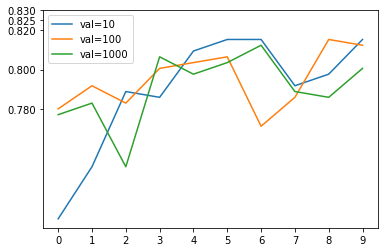

In [16]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [8]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [13]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
[2021-11-03 21:19:20.707 ip-172-16-13-140:18999 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 21:19:20.814 ip-172-16-13-140:18999 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/30
96/96 [==============================] - 56s 583ms/step - loss: 0.9642 - accuracy: 0.6747 - val_loss: 0.6832 - val_accuracy: 0.7566
Epoch 2/30
96/96 [==============================] - 15s 158ms/step - loss: 0.5163 - accuracy: 0.8230 - val_loss: 0.6058 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 15s 160ms/step - loss: 0.3458 - accuracy: 0.8885 - val_loss: 0.5577 - val_accuracy: 0.8270
Epoch 4/30
96/96 [==============================] - 15s 161ms/step - loss: 0.2575 - accuracy: 0.9218 - val_loss: 0.5166 - val_accuracy: 0.8416
Epoch 5/30
96/96 [==============================] - 15s 1

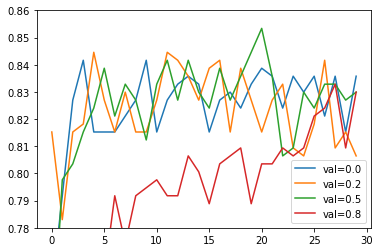

In [16]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

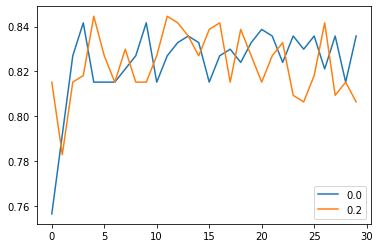

In [23]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [17]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [18]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 19s 200ms/step - loss: 1.0738 - accuracy: 0.6346 - val_loss: 0.6670 - val_accuracy: 0.7859
Epoch 2/50
96/96 [==============================] - 16s 162ms/step - loss: 0.6210 - accuracy: 0.7846 - val_loss: 0.5732 - val_accuracy: 0.8182
Epoch 3/50
96/96 [==============================] - 16s 162ms/step - loss: 0.4573 - accuracy: 0.8387 - val_loss: 0.5620 - val_accuracy: 0.8182
Epoch 4/50
96/96 [==============================] - 15s 161ms/step - loss: 0.3637 - accuracy: 0.8797 - val_loss: 0.5376 - val_accuracy: 0.8094
Epoch 5/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2951 - accuracy: 0.9042 - val_loss: 0.5465 - val_accuracy: 0.8065
Epoch 6/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2348 - accuracy: 0.9283 - val_loss: 0.6016 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] 

KeyboardInterrupt: 

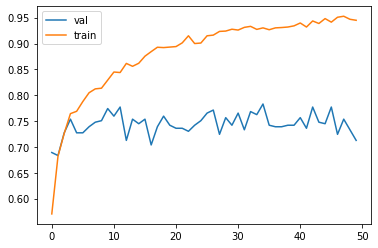

In [12]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [19]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [25]:
input_size = 299

In [38]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [39]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [40]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 78s 816ms/step - loss: 1.0387 - accuracy: 0.6793 - val_loss: 0.5567 - val_accuracy: 0.8211
Epoch 2/50
96/96 [==============================] - 77s 805ms/step - loss: 0.5472 - accuracy: 0.8214 - val_loss: 0.4331 - val_accuracy: 0.8622
Epoch 3/50
96/96 [==============================] - 74s 772ms/step - loss: 0.4525 - accuracy: 0.8491 - val_loss: 0.4360 - val_accuracy: 0.8504
Epoch 4/50
96/96 [==============================] - 75s 778ms/step - loss: 0.4000 - accuracy: 0.8605 - val_loss: 0.3728 - val_accuracy: 0.8856
Epoch 5/50
96/96 [==============================] - 75s 785ms/step - loss: 0.3586 - accuracy: 0.8853 - val_loss: 0.3832 - val_accuracy: 0.8768
Epoch 6/50
96/96 [==============================] - 75s 777ms/step - loss: 0.3261 - accuracy: 0.8934 - val_loss: 0.3828 - val_accuracy: 0.8827
Epoch 7/50
96/96 [==============================] 

KeyError: 'val_accuracy'

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [3]:
import tensorflow as tf
from tensorflow import keras

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [7]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [11]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [10]:
model.evaluate(test_ds)

  ...
    to  
  ['...']
12/12 [==============================] - 8s 645ms/step - loss: 0.2939 - accuracy: 0.8978


[0.29389633300403756, 0.89784944]

In [12]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [15]:
img = load_img(path, target_size=(299, 299))

In [16]:
import numpy as np

In [18]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [21]:
X = preprocess_input(X)

In [23]:
pred = model.predict(X)

In [25]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [26]:
dict(zip(classes, pred[0]))

{'dress': -1.4282539,
 'hat': -5.522186,
 'longsleeve': -3.1655293,
 'outwear': -2.201648,
 'pants': 9.294684,
 'shirt': -3.4289198,
 'shoes': -4.2395606,
 'shorts': 3.4339347,
 'skirt': -4.194675,
 't-shirt': -2.9939806}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

